<a href="https://colab.research.google.com/github/josephychin/sales-predictions/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Part 3 (Core)

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to build several data visualizations that help you better understand the data and to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Use the data you cleaned last week. If needed, you can download the raw data. (Note: Original data source)
Create various data visualizations that help you better understand the data you are working with (exploratory data analysis) and help others understand trends in the data (explanatory data analysis).

Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
filename = '/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/sales_predictions_cleaned.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [13]:
df.isna().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df['Outlet_Size'].fillna('N/A', inplace=True)

In [17]:
df.isna().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
dfItemTypeItemFatContent = df.groupby(['Item_Type', 'Item_Fat_Content'], sort=False)
dfItemTypeItemFatContentMean = dfItemTypeItemFatContent.mean().reset_index()
dfItemTypeItemFatContentMean

,Item_Type,Item_Fat_Content,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Dairy,Low Fat,4203.064593,13.396790,0.069884,147.115989,1997.772727,2145.174151
1,Soft Drinks,Regular,4039.422535,11.332881,0.070315,121.771014,1997.802817,1854.065451
2,Meat,Low Fat,4164.458824,13.398377,0.056635,130.998788,1997.311765,2035.616920
3,Fruits and Vegetables,Regular,4254.714286,13.627229,0.070632,152.977571,1997.745847,2400.571761
4,Household,Low Fat,4263.302198,13.384736,0.061322,149.424753,1997.784615,2258.784300
5,Baking Goods,Regular,4255.194357,12.050517,0.072283,132.419203,1998.159875,2147.340665
6,Snack Foods,Regular,4340.588583,12.187874,0.062774,132.159813,1997.937008,2093.891196
7,Snack Foods,Low Fat,4211.861272,13.575167,0.069842,156.498173,1997.849711,2411.978843
8,Frozen Foods,Regular,4195.246305,13.131896,0.072880,137.931307,1998.241379,2149.861640
9,Fruits and Vegetables,Low Fat,4170.031746,12.840197,0.066488,136.558069,1997.695238,2182.405740


In [18]:
dfItemType = df.groupby('Item_Type', sort=False)
dfItemTypeMean = dfItemType.mean().reset_index()
dfItemTypeMean

,Item_Type,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Dairy,4227.913490,13.426069,0.072427,148.499208,1997.681818,2232.542597
1,Soft Drinks,4191.851685,11.847460,0.063972,131.492506,1998.098876,2006.511735
2,Meat,4273.089412,12.817344,0.062284,139.882032,1997.341176,2158.977911
3,Fruits and Vegetables,4211.410714,13.224769,0.068513,144.581235,1997.719968,2289.009592
4,Household,4263.302198,13.384736,0.061322,149.424753,1997.784615,2258.784300
5,Baking Goods,4325.876543,12.277108,0.069169,126.380766,1997.728395,1952.971207
6,Snack Foods,4266.355833,12.987880,0.066850,146.194934,1997.886667,2277.321739
7,Frozen Foods,4148.463785,12.867061,0.065645,138.503366,1998.024533,2132.867744
8,Breakfast,4264.936364,12.768202,0.085723,141.788151,1997.336364,2111.808651
9,Health and Hygiene,4571.042308,13.142314,0.055216,130.818921,1997.734615,2010.000265


In [22]:
dfItemTypeMeanToList = dfItemTypeMean['Item_Weight'].tolist()
dfItemTypeMeanToList

[13.4260689045937,
 11.847459893048129,
 12.817344213649854,
 13.224769381746826,
 13.384736495388758,
 12.277108208955223,
 12.987879554655894,
 12.867061281337037,
 12.768202247191004,
 13.142313953488394,
 11.400327868852454,
 12.30570500927647,
 11.346936274509813,
 13.69073076923077,
 13.85328467153285,
 12.5528431372549]

In [23]:
dfItemTypeToList = dfItemTypeMean['Item_Type'].tolist()
dfItemTypeToList

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

Text(0.5, 1.0, 'Item Type Weight Mean')

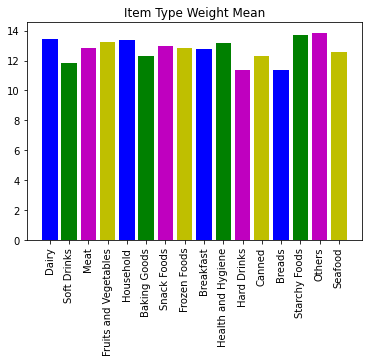

In [24]:
plt.bar(dfItemTypeToList, dfItemTypeMeanToList, color = ['b', 'g', 'm', 'y'])
plt.xticks(rotation = 90)
plt.title('Item Type Weight Mean')

In [25]:
dfOutletType = df.groupby('Outlet_Type').size()
dfOutletType

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
dtype: int64

In [26]:
dfOutletType.index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

In [27]:
dfOutletType.values

array([1083, 5577,  928,  935])

Text(0.5, 1.0, 'Outlet Types')

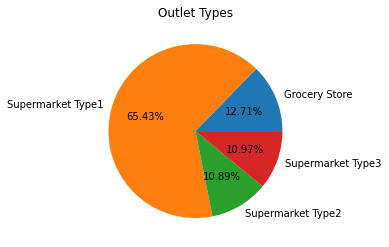

In [28]:
plt.pie(dfOutletType.values, labels=dfOutletType.index, autopct='%.2f%%')
plt.title('Outlet Types')

In [29]:
dfItemOutletTypeSum = df.groupby('Outlet_Type').sum()
dfItemOutletTypeSum

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Type,,,,,,
Grocery Store,4729313,13964.681089,113.565873,151939.1470,2156970,3.680343e+05
Supermarket Type1,23507113,71661.710000,338.651189,787549.8868,11150224,1.291734e+07
Supermarket Type2,4087186,11946.465000,56.621454,131477.7724,1864352,1.851823e+06
Supermarket Type3,3992891,12014.940425,54.804764,130714.6746,1855975,3.453926e+06


In [30]:
dfItemOutletTypeSum['Item_Outlet_Sales'].index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

Text(0.5, 1.0, 'Outlet Types Sales')

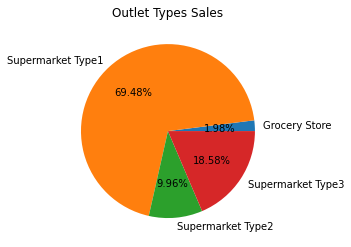

In [31]:
plt.pie(dfItemOutletTypeSum['Item_Outlet_Sales'].values, labels=dfItemOutletTypeSum['Item_Outlet_Sales'].index, autopct='%.2f%%')
plt.title('Outlet Types Sales')

Text(0.5, 1.0, 'Outlet Type Weight')

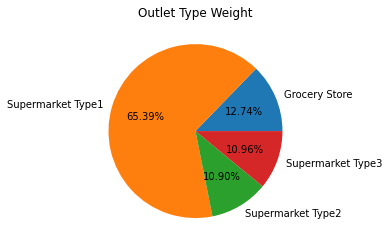

In [32]:
plt.pie(dfItemOutletTypeSum['Item_Weight'].values, labels=dfItemOutletTypeSum.index, autopct='%.2f%%')
plt.title('Outlet Type Weight')

In [33]:
dfOutletEstablishmentYear = df.groupby(['Outlet_Type', 'Outlet_Establishment_Year']).size()
dfOutletEstablishmentYear

Outlet_Type        Outlet_Establishment_Year
Grocery Store      1985                         528
                   1998                         555
Supermarket Type1  1987                         932
                   1997                         930
                   1999                         930
                   2002                         929
                   2004                         930
                   2007                         926
Supermarket Type2  2009                         928
Supermarket Type3  1985                         935
dtype: int64

In [34]:
# dfOutletEstablishmentYear['Outlet_Establishment_Year'].index